In [40]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

% matplotlib inline

In [12]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [14]:
# use knn on whole dataset

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(X, Y)

result = knn.predict([[3, 5, 4, 2]])

print(iris.target_names[result])
print(knn.predict_proba([[3, 5, 4, 2]]))

['versicolor']
[[ 0.   0.8  0.2]]


In [60]:
# split whole data -> hold-out

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# use knn on train dataset

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc = np.sum(Y_pred == Y_test) /  len(Y_test)
acc * 100

98.0

The optimal number of neighbors is 13


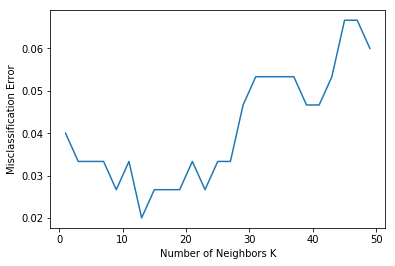

In [61]:
# cross validation -> using holdout method for k times

# creating odd list of K for KNN
klist = list(range(1,50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation for each k value
for k in klist:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
errors = 1- np.array(cv_scores)

# determining best k
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
